In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

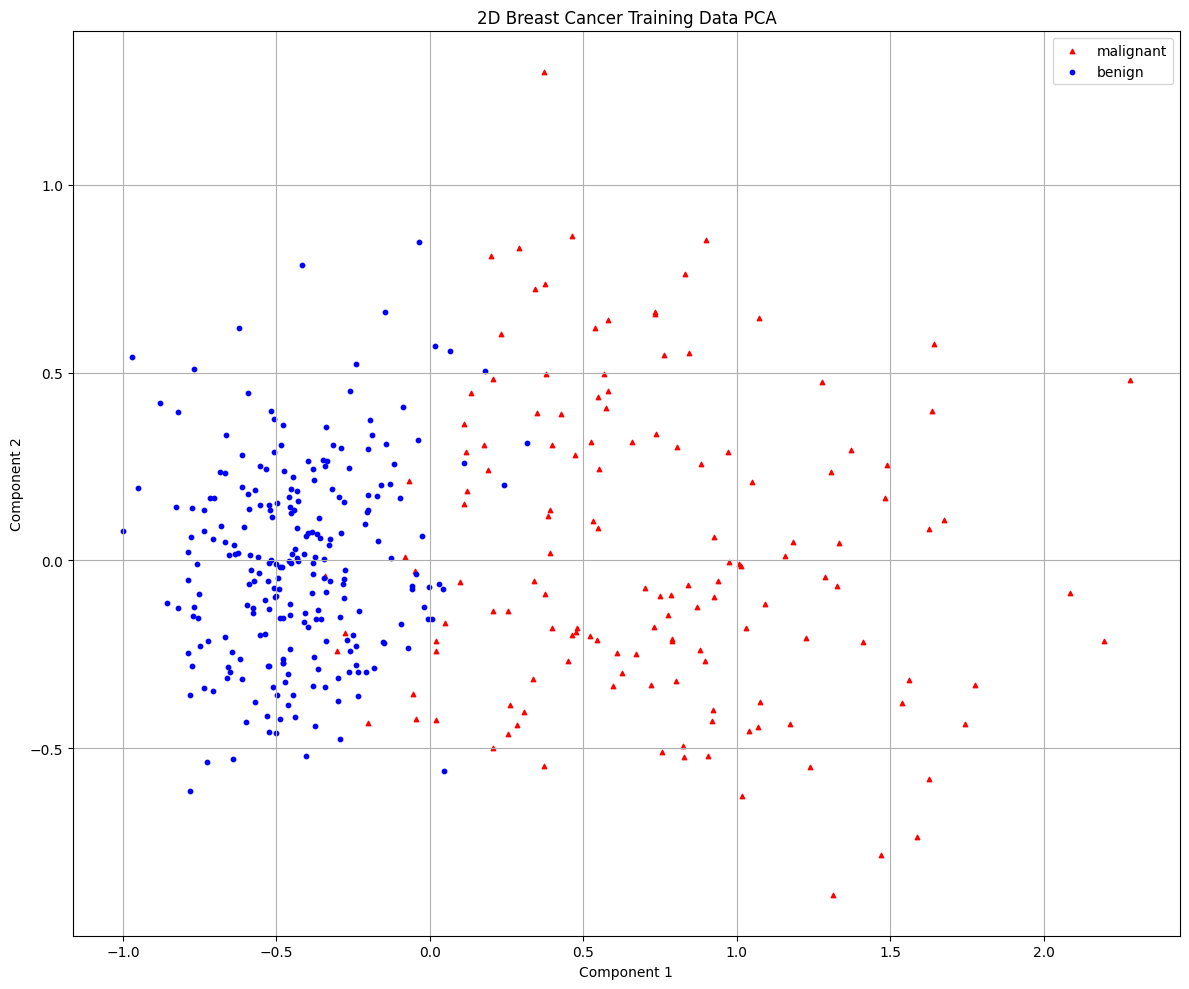

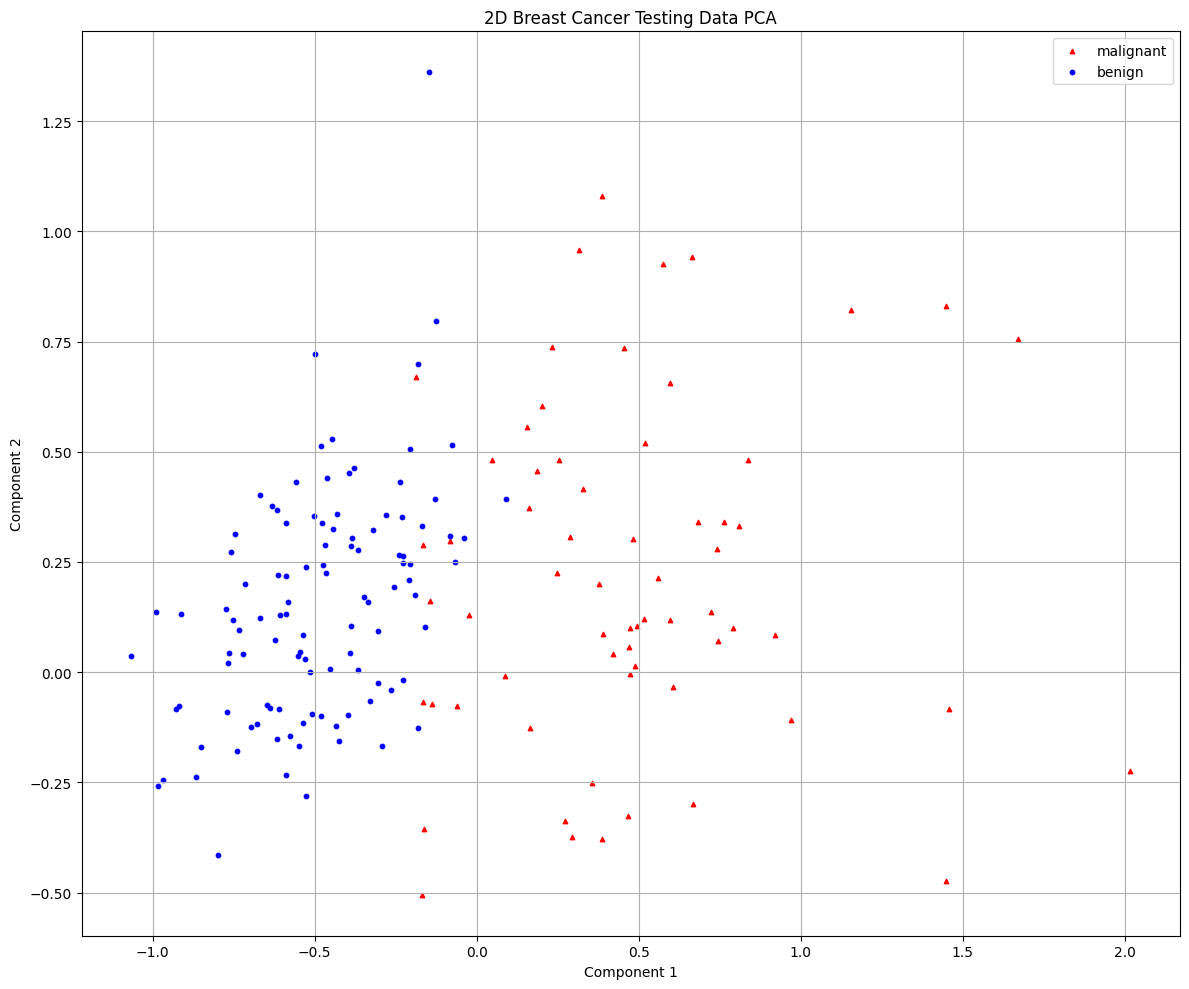

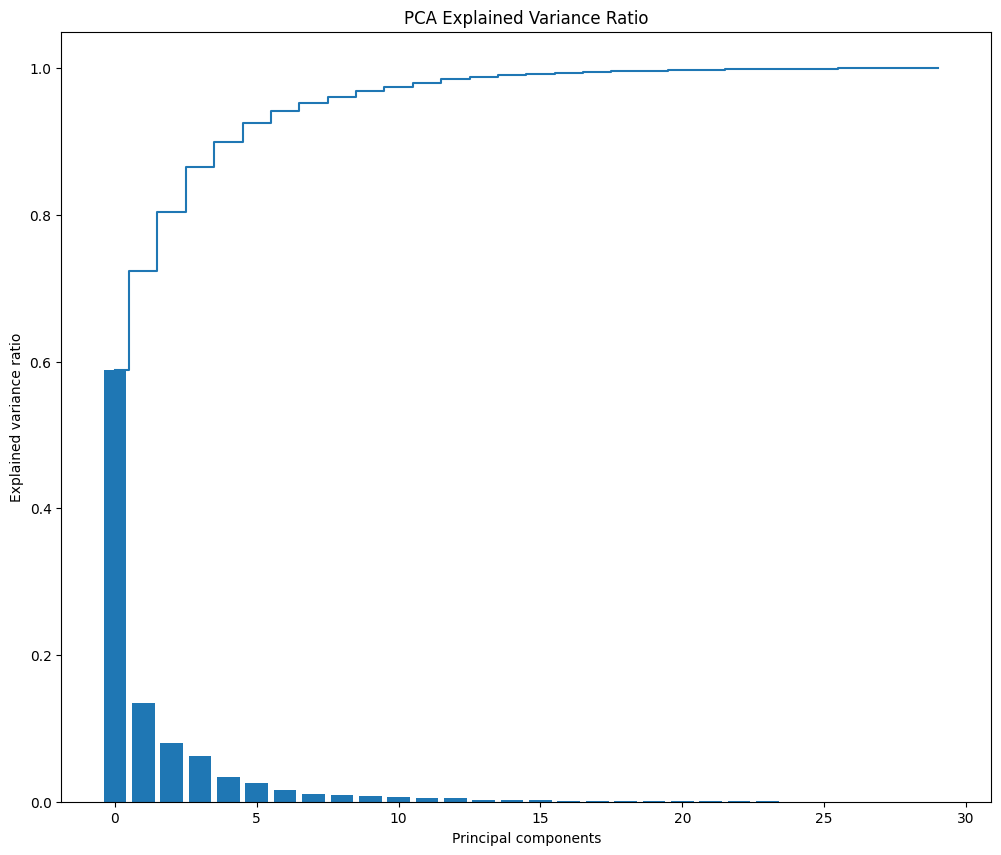

In [2]:
outlier_params = {'n_neighbors': 20}
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'loc', outlier_params)

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {})

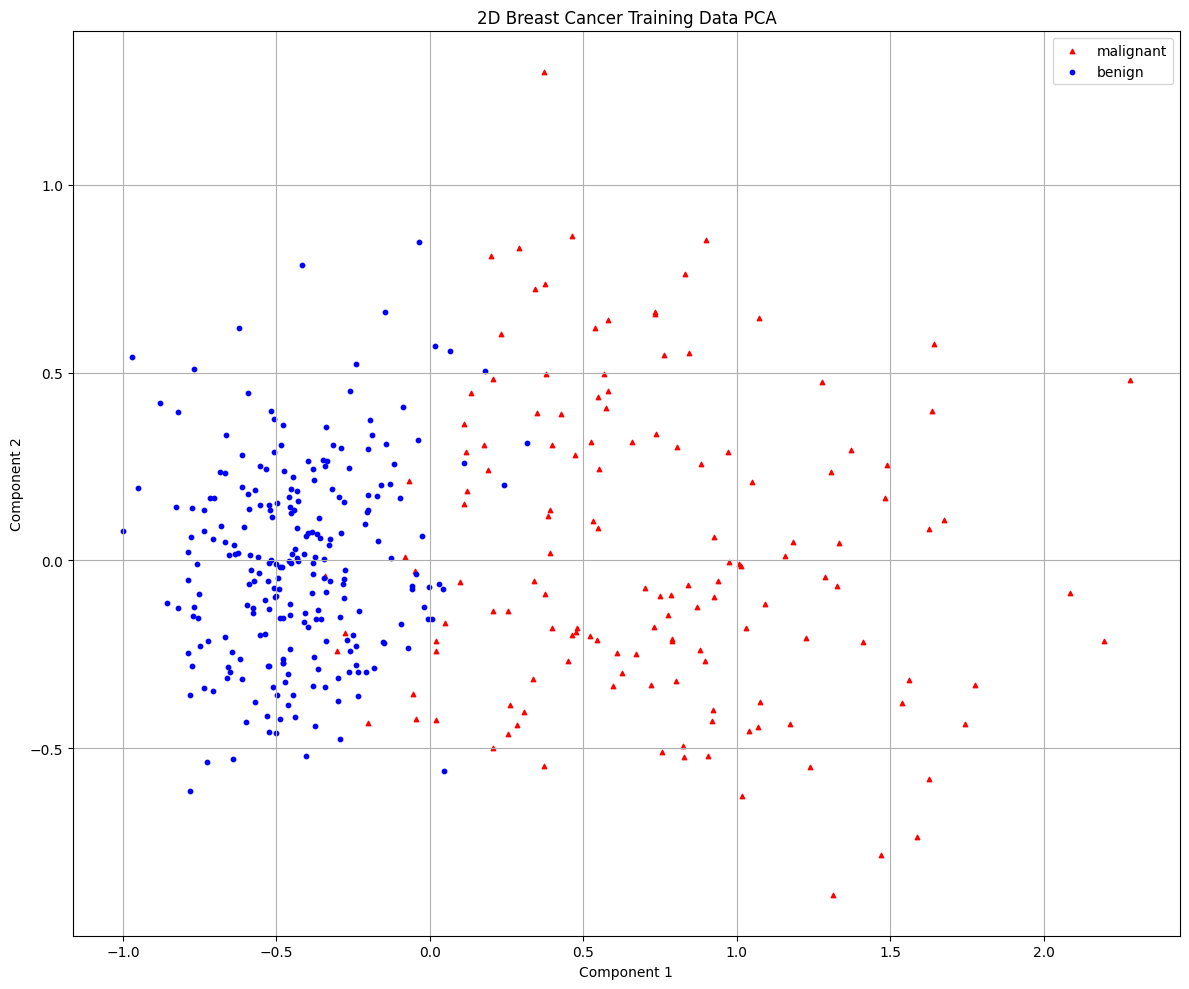

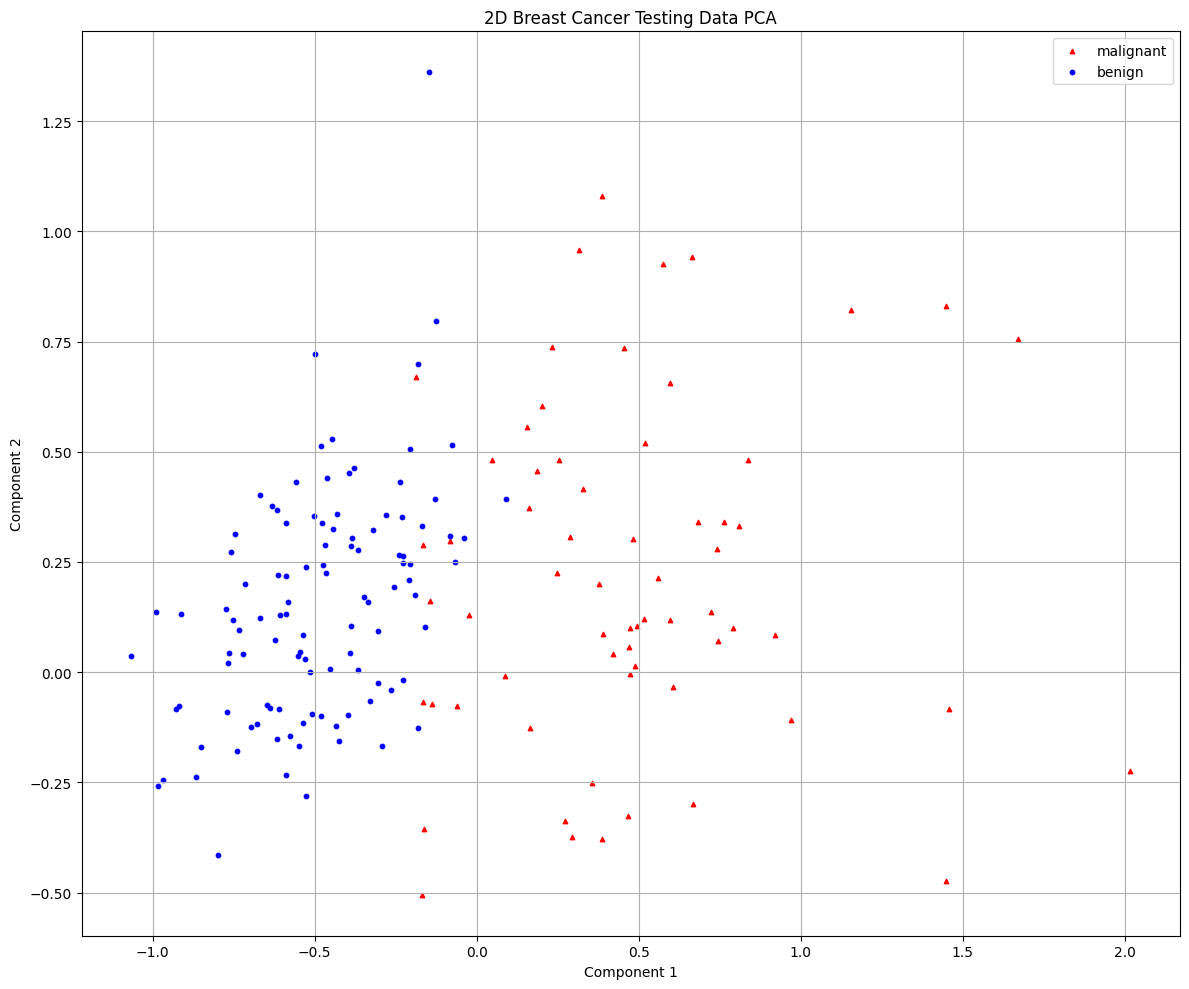

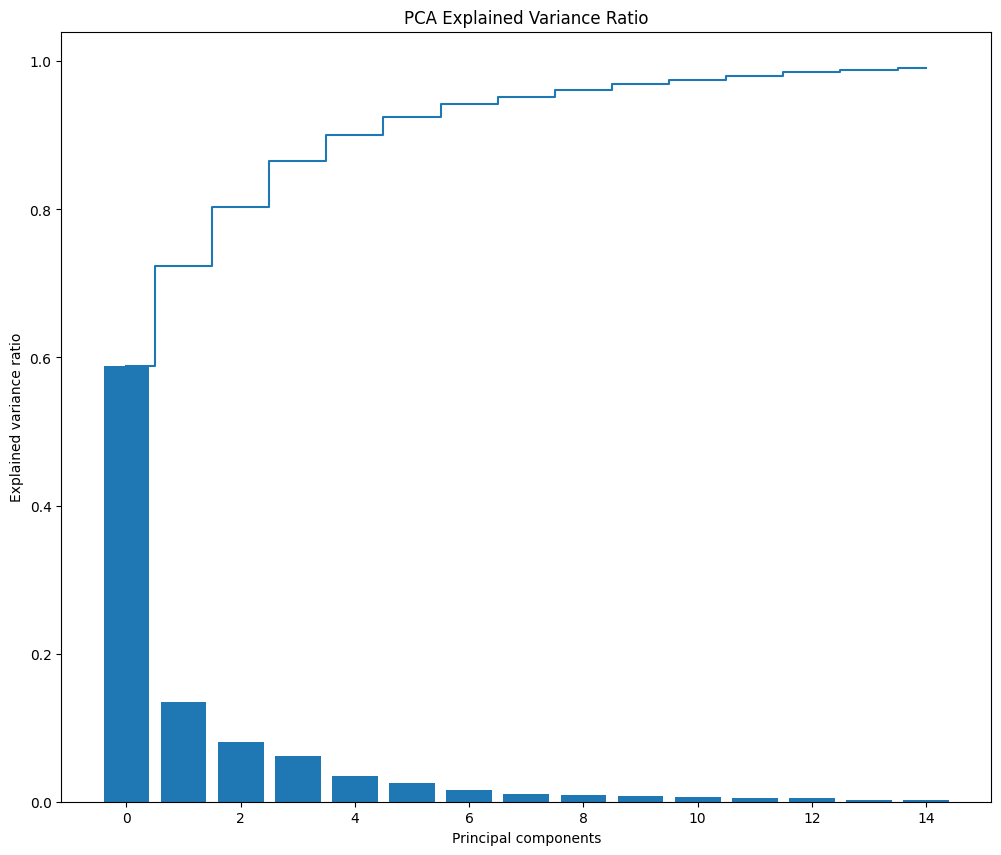

[I 2025-04-27 10:31:21,532] A new study created in memory with name: no-name-45529a42-5da8-4d3d-b2d9-5b8e5a835f80
[I 2025-04-27 10:31:24,653] Trial 0 finished with value: 0.9552631578947368 and parameters: {'n_estimators': 673, 'max_depth': 12, 'min_samples_split': 19, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.9552631578947368.
[I 2025-04-27 10:31:25,350] Trial 1 finished with value: 0.9578947368421054 and parameters: {'n_estimators': 142, 'max_depth': 28, 'min_samples_split': 15, 'min_samples_leaf': 8}. Best is trial 1 with value: 0.9578947368421054.
[I 2025-04-27 10:31:26,885] Trial 2 finished with value: 0.9578947368421054 and parameters: {'n_estimators': 344, 'max_depth': 21, 'min_samples_split': 4, 'min_samples_leaf': 6}. Best is trial 1 with value: 0.9578947368421054.
[I 2025-04-27 10:31:30,525] Trial 3 finished with value: 0.95 and parameters: {'n_estimators': 769, 'max_depth': 5, 'min_samples_split': 9, 'min_samples_leaf': 19}. Best is trial 1 with value: 0.95789473

Best trial:
Accuracy: 0.9657894736842106
Best hyperparameters:  {'n_estimators': 630, 'max_depth': 6, 'min_samples_split': 17, 'min_samples_leaf': 5}


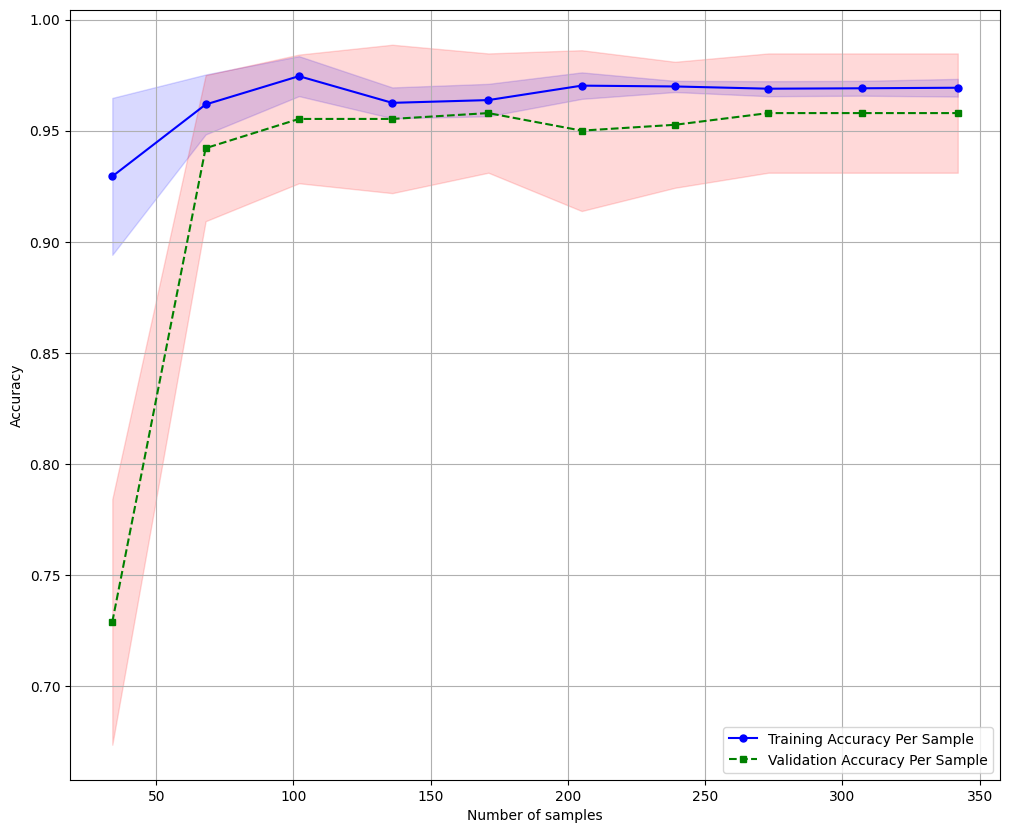

Confusion Matrix
[[ 55   9]
 [  1 106]]
Accuracy: 0.9415, Precision: 0.9217, Recall: 0.9907, F1: 0.9550, AUC: 0.9820


In [3]:
X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'pca', {'n_components': 15})
helper.train_and_evaluate_model('rf', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)